<a href="https://colab.research.google.com/github/daonly/2023Autumn/blob/main/%5B%EB%8D%B0%EA%B3%BC%EC%88%98%5D%20%EC%8B%A4%EC%8A%B5%202%20%EC%B0%B8%EA%B3%A0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*   [NumPy](https://numpy.org/doc/stable/) Documentation
*   [matplotlib.pyplot](https://matplotlib.org/3.5.3/tutorials/introductory/pyplot.html#sphx-glr-tutorials-introductory-pyplot-py) Documentation
*   [SymPy](https://docs.sympy.org/latest/index.html) Documentation

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

### 1. 함수

#### 예제 1-1.

구간 $[-1, 5]$에서 함수 $f$을 다음과 같이 정의합니다.

$$f(x)=\begin{cases} -x^2+2, & -1\leq x < 1 \\ x^2-4x+3, & 1 \leq x \leq 3 \\ -x^2+8x-14, & 3<x\leq5 \end{cases}$$

함수 $f$의 함수값을 출력하는 파이썬 함수 $f(x)$을 작성하고, 이 함수를 이용해 구간 $[-1, 5]$에서 함수 $f$의 그래프를 그리는 코드를 작성하시오.

*   [```numpy.linspace()```](https://numpy.org/doc/stable/reference/generated/numpy.linspace.html)
*   [```numpy.zeros_like()```](https://numpy.org/doc/stable/reference/generated/numpy.zeros_like.html)



> np.linspace와 np.arange

In [ ]:
def f(x):
  if x < 1:
    return -x**2 + 2
  if x <=3:
    return x **2 -4*x + 3
  else:
    return -x**2 + 8*x - 14

In [ ]:
x = np.linspace(-1, 5, 601)

첫번째 방법은,

In [ ]:
fx = np.zeros_like(x)

두번째 방법으로,

In [ ]:
fx = [f(i) for i in x]

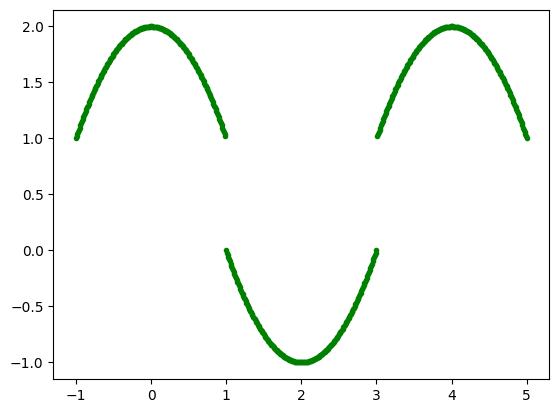

In [ ]:
for i in range(0, 601):
  fx[i] = f(x[i])

plt.plot(x, fx, '.g')
plt.show()

> matplotlib.pyplot의 편리성 vs  explicit API의 유연성

> 플롯 스타일 포맷팅

    * [matplotlib.pyplot.plot](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot)
    * [color][marker][line]

#### 예제 1-2.

$$f(x) = 3x-4$$

$$f^{-1}(x) = \frac{1}{3}(x+4)$$

$f$의 그래프와 $f^{-1}$을 시각화하여 교점을 찾으시오.



In [ ]:
def f(x):
  return 3*x - 4

def f_inv(x):
  return (x+4)/3

def identity(x):
  return x

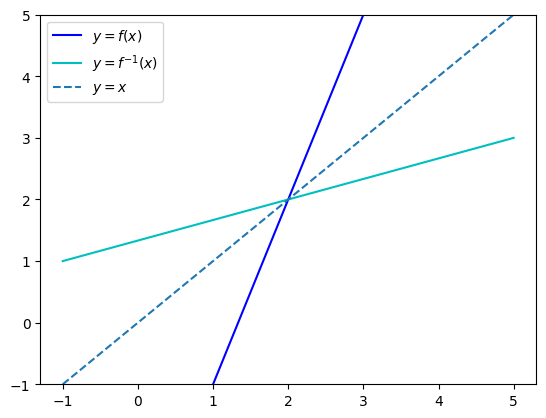

In [ ]:
x = np.linspace(-1, 5, 601)
graph,  = plt.plot(x, f(x), 'b')
graph1, = plt.plot(x, f_inv(x), 'c')
graph2, = plt.plot(x, identity(x), "--")
plt.legend(handles=(graph, graph1, graph2),
           labels=(r'$y=f(x)$', r'$y=f^{-1}(x)$', r'$y=x$'))
plt.ylim(-1, 5)
plt.show()

> Line2D 객체의 변수화
    
`plt.plot` 함수는 무조건 리스트 객체를 반환하므로, Line2D 객체만을 추출하는 방법

> TeX in matplotlib text

raw string with dollar sign (r'$<TeX code>$')

TeX 를 편리하게 사용하기 위해 만든 포맷 -> LaTeX

[Rendering math equations using TeX](https://matplotlib.org/stable/gallery/text_labels_and_annotations/tex_demo.html)

#### 예제 1-3.

$$g(x) = x^2+1$$

$$g^{-1}(x) = \sqrt{x-1}(x\geq1)$$

$g$의 그래프와 $g^{-1}$을 시각화하여 교점을 찾으시오.

In [ ]:
def g(x):
  return x**2 + 1

def g_inv(x):
  return np.sqrt(x-1)

/tmp/ipykernel_1497/2372714319.py:5: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(x-1)


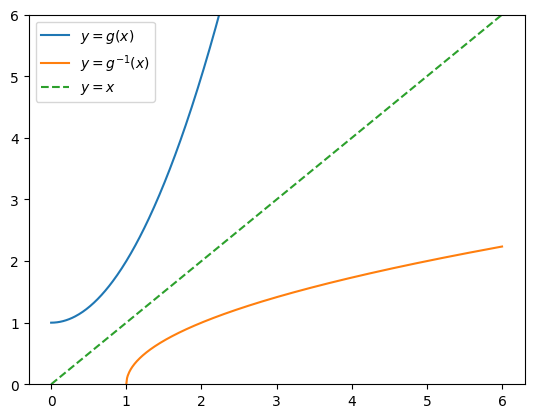

In [ ]:
x = np.linspace(0, 6, 601)
graph, = plt.plot(x, g(x))
graph1, = plt.plot(x, g_inv(x))
graph2, = plt.plot(x, identity(x), "--")
plt.legend(handles=(graph, graph1, graph2),
           labels=(r'$y=g(x)$', r'$y=g^{-1}(x)$', r'$y=x$'))
plt.ylim(0, 6)
plt.show()

### 2. 극한


*   [Sympy Calculus Tutorial](https://docs.sympy.org/latest/tutorials/intro-tutorial/calculus.html)



#### 예제 2-1.

다음 함수의 그래프를 그려 극한값을 추정한 후, `sympy`의 결과와 비교하시오.

$$\lim_{x\to∞}\frac{1}{x}$$

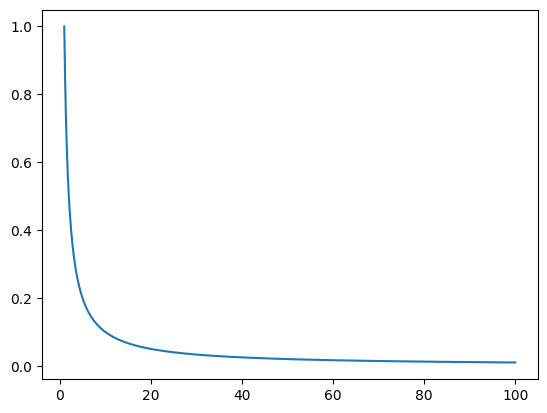

In [ ]:
x = np.linspace(1, 100, 1001)
fx = 1/x

plt.plot(x, fx)
plt.show()

In [ ]:
from sympy import Limit, Symbol, oo

x = Symbol('x')
Limit(1/x, x, oo).doit()

0

> Sympy

**Sym**bolic mathematics in **Py**thon

> Symbol

데이터가 아닌, Symbol로 인식하겠음

> Limit

```python
Limit(expression, variable, value)
```

> doit method

극한, 미분, 적분 연산 메소드에 대해 Evaluation

[SymPy ```.doit()```](https://docs.sympy.org/latest/modules/core.html?highlight=doit#sympy.core.basic.Basic.doit)

#### 예제 2-2.

다음 함수의 그래프를 그려 극한값을 추정한 후, `sympy`의 결과와 비교하시오.

$$\lim_{x\to-∞}(x^3+2x)$$

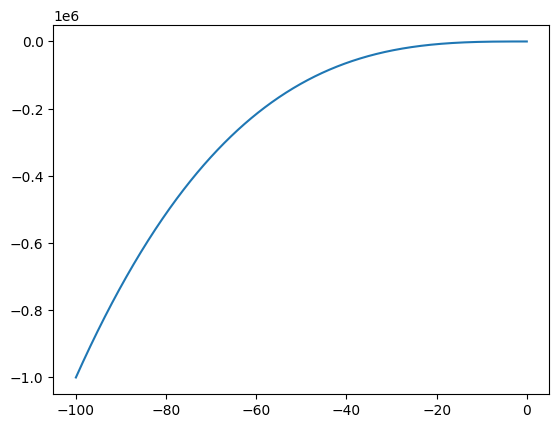

In [ ]:
x = np.linspace(-100, 0, 1001)
gx = x**3 + 2*x
plt.plot(x, gx)
plt.show()

In [ ]:
from sympy import Limit, Symbol, oo

x = Symbol('x')
Limit(x**3 + 2*x, x, -oo).doit()

-oo

### 3. 미분

#### 예제 3-1.

다음 함수의 도함수를 구하시오.

$$f(x)=x^{2023}+3x^3-1$$


In [ ]:
from sympy import Symbol, simplify, Derivative

x  = Symbol('x')

fx = x**2023 + 3*x**3 - 1

In [ ]:
Derivative(fx, x).doit()

2023*x**2022 + 9*x**2

In [ ]:
simplify(Derivative(fx, x).doit())

x**2*(2023*x**2020 + 9)

> simplify

[SymPy simplification](https://docs.sympy.org/latest/tutorials/intro-tutorial/simplification.html)

> Derivative

[SymPy ```Derivative()``` class](https://docs.sympy.org/latest/modules/core.html?highlight=derivative#sympy.core.function.Derivative)

#### 예제 3-2.

다음 함수의 도함수를 구하시오.

$$g(x)=\frac{x}{x+1}$$


In [ ]:
from sympy import Symbol, simplify, Derivative

x = Symbol('x')
gx = x / (x+1)

print(f"g'(x)= {simplify(Derivative(gx, x).doit())}")

g'(x)= (x + 1)**(-2)


> f-string

Python에서 문자를 포맷팅하는 편리한 방법

[f-string Formatting in Python](https://www.datacamp.com/tutorial/f-string-formatting-in-python)

#### 예제 3-3.

다음 함수의 도함수를 구하시오.

$$f(x)=sin(x)cos(x)$$

In [ ]:
import sympy as sp

x = sp.Symbol('x')
fx = sp.sin(x) * sp.cos(x)
print("f'(x)=", sp.simplify(sp.diff(fx, x)))

f'(x)= cos(2*x)


> sp.diff

Evaluation이 바로 일어나는 함수

#### 예제 3-4.

$x$와 $y$에 대한 관계식 $x^2 + 2y^2-xy-3x-4y=5$에서 $\frac{dy}{dx}$를 구하시오.

*   [SymPy ```idiff()```](https://docs.sympy.org/latest/modules/geometry/utils.html?highlight=idiff#sympy.geometry.util.idiff)



In [ ]:
from sympy import Symbol, idiff

x = Symbol('x')
y = Symbol('y')
fxy = x**2 + 2*y**2 - x*y - 3*x -4*y - 5

idiff(fxy, y, x)

(2*x - y - 3)/(x - 4*y + 4)

#### 예제 3-5.

다음 곡선 위에 주어진 점에서의 접선의 기울기를 구하시오.

$$f = x^3+2x-1, (1, 2)$$

In [ ]:
from sympy import * # sympy 내 모든 함수를 불러옴

x = Symbol('x')
f = x**3 + 2*x - 1
df = Derivative(f, x).doit()

print(df)
print(f"f'(1) = {df.subs(x, 1)}")

3*x**2 + 2
f'(1) = 5


> [SymPy ```subs()```](https://docs.sympy.org/latest/modules/core.html?highlight=subs#sympy.core.basic.Basic.subs)

foo.subs(old, new)

foo.subs(iterable)

foo.subs(dict)



#### 예제 3-6.

다음 함수의 극값을 구하시오.

$$f(x)=-2x^3-3x^2+1$$

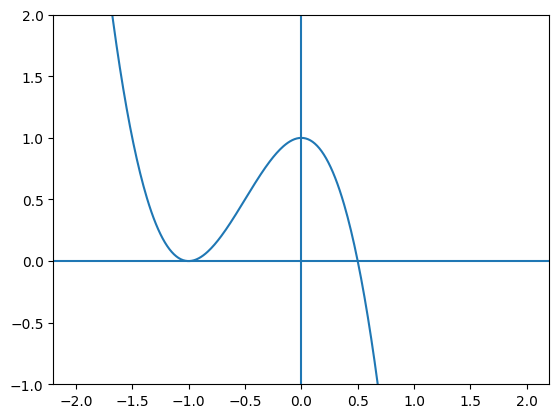

In [ ]:
x = np.linspace(-2, 2, 401)
fx = -2*x**3 - 3*x**2 + 1

plt.plot(x, fx)
plt.axhline(0)
plt.axvline(0)
plt.ylim(-1, 2)
plt.show()

In [ ]:
from sympy import Symbol, Derivative, solve

x = Symbol('x')
f = -2*x**3 - 3*x**2 + 1

df = Derivative(f, x).doit()
print(solve(df))

[-1, 0]


*   [SymPy ```solve()```](https://docs.sympy.org/latest/modules/solvers/solvers.html?highlight=solve#sympy.solvers.solvers.solve)



(참고) Sympy 함수 표현을 파이썬 함수로 변환하는 방법
    
[`lambdify`(변수, 표현식)](https://docs.sympy.org/latest/modules/utilities/lambdify.html#sympy.utilities.lambdify.lambdify)

In [ ]:
from sympy import Symbol, lambdify

x = Symbol('x')
sympy_f = x**2

print(type(sympy_f)) # sympy 내의 클래스

f = lambdify(x, sympy_f)

f(2) # 수치연산 가능

<class 'sympy.core.power.Pow'>


4